# LiDAR Camera Fusion 
## Done by: Abhinav

We want to fuse image data from a camera with distance measurements from a LiDAR to associate every point in the image with accurate distance measurements. The LiDAR points and the camera image have been provided. 

This code uses numpy arrays and matplotlib to plot the final points on the image. loadpoints.py has been provided, which has a function "load_velodyne_points" that returns the LiDAR points

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from loadpoints import load_velodyne_points

Camera Calibration matrix, that has been provided in K.txt.

In [2]:
cal_mat = np.array( [ [7.215377e+02, 0.000000e+00, 6.095593e+02], 
                      [0.000000e+00, 7.215377e+02, 1.728540e+02],
                      [0.000000e+00, 0.000000e+00, 1.000000e+00]  ] ) 
print ("Calibration matrix:\n", cal_mat)

Calibration matrix:
 [[721.5377   0.     609.5593]
 [  0.     721.5377 172.854 ]
 [  0.       0.       1.    ]]


## Rotation and Translation
We have been given the coordinate frames of the LiDAR and the camera. We need to rotate the LiDAR frame in such a way that it transforms to the coordinate frame of the camera. This can be achieved by rotating the LiDAR frame about X axis by -90 degrees and about Z axis by -90 degrees. Hence we define the rotation matrix to go from the LiDAR frame to the camera frame. 

The camera is placed 8cm below, 6cm **left** and 27 cm in front. Hence, we similarly define the translation matrix, to move the LiDAR frame to perfectly coincide with the camera frame. 
We append the translation matrix to the rotation one to get Rt.

In [3]:
rot_mat = np.array( [ [0, -1, 0],
                      [0, 0, -1],
                      [1, 0, 0 ]  ] )
print ("Rotation matrix: ( Rz(-90)*Rx(-90) )\n", rot_mat)

trans_mat = np.array( [ [-6, 8, 27] ])
Rt = np.hstack(( rot_mat, trans_mat.transpose() ))
print ("RT matrix:\n", Rt)

Rotation matrix: ( Rz(-90)*Rx(-90) )
 [[ 0 -1  0]
 [ 0  0 -1]
 [ 1  0  0]]
RT matrix:
 [[ 0 -1  0 -6]
 [ 0  0 -1  8]
 [ 1  0  0 27]]


We load the LiDAR points and append a column of ones to it. The shape of the points matrix is (6952, 3), which we can easily obtained by `print points.shape` So the column of ones that we append must also have 6952 rows. We use numpy.hstack to add a new column to an already existing matrix.

In [4]:
points = load_velodyne_points('lidar-points.bin')
print("Size of points:", points.shape)
ones_mat = np.ones((6952,1))
points_mat = np.hstack(( points, ones_mat ))
print("Size of points after appending ones:", points_mat.shape)

Size of points: (6952, 3)
Size of points after appending ones: (6952, 4)


## Transforming to the camera frame
Now, we have our points in points_mat, the camera calibration matrix 'K' and our Rt matrix to transform to the camera frame. So we do **K * Rt * points** to get the 'final' matrix. We use numpy.matmul to multiply the matrices, because numpy.dot is too mainstream. 

In [5]:
temp = np.matmul(cal_mat, Rt)
final = np.matmul(temp, points_mat.transpose() )

And finally, because we have homogeneous coordinates, we divide by the last row of the matrix. ( (x,y,w) = (x/w, y/w, 1) )

In [6]:
final = final/final[2,:]

## Plotting the points
We plot the points using matplotlib. We only consider the first two rows, because the third row is just full of 1's. Because we need a different colour for each point to bring about some sort of a 'depth effect', we do c = 1/points[:,0]. 

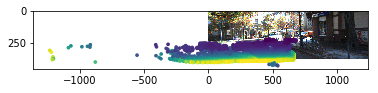

In [7]:
img = plt.imread("image.png")
plt.imshow(img)
plt.scatter(final[0,:], final[1,:], c=1/points[:,0], s=7);
plt.show()

This was the original image: 

![original](image.png)

This is how the image appears when zoomed in. This can be obtained by running the python file 'q1.py' directly using `python3 q1.py` and using the magnifier tool to zoom into the image to view the plotted points clearly. 
![original](ss1.png)

## Euler Angles
We have talked about the transformation in the homogeneous matrix form. To go from the LiDAR frame to camera frame, we do **K\*Rt\*X**, where X is the point in the original frame of reference, K is calibration matrix, and we have found Rt.

R = (0, -1, 0), (0, 0, -1), (1, 0, 0 )

T = (-6, 8, 27)

Euler angles will be (-90, 0, -90)

Rx(90) = (1,0,0), (0,0,-1), (0,1,0)
Rz(90) = (0,-1,0), (1,0,0), (0,0,1)
Rx(90) multiplied by Rz(90) would give us our rotation matrix as we got above. 